In [1]:
import os
import numpy as np
import h5py
import scipy.io
np.random.seed(7) # for reproducibility

import keras.backend as K
from keras.models import Model, load_model

import matplotlib.pyplot as plt
import matplotlib
#from concise.utils.plot import seqlogo, seqlogo_fig

import sys
print (os.getcwd())
sys.path.append("../Scripts/")
from IntegratedGradients import *
from util_funcs import *
from plotseqlogo import seqlogo, seqlogo_fig

Using TensorFlow backend.


/Users/storm/git/Multi-resBind/jupyter_notebooks


../Scripts/plotseqlogo.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
../Scripts/plotseqlogo.py:42: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)


In [2]:
### library to use R
%load_ext rpy2.ipython
%load_ext rmagic

/anaconda3/lib/python3.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [3]:
def load_data_SHBIME(path_to_data):

    data = h5py.File(path_to_data,'r')
    X_test_seq = np.transpose(np.array(data['test_in_seq']),axes=(0,2,1))
    X_test_annotation = np.transpose(np.array(data['test_in_annotation']),axes=(0,2,1))
    X_test_region = np.transpose(np.array(data['test_in_region']),axes=(0, 2, 1))
    y_test_RBP = np.array(data['test_out'])
    y_test_name= np.array(data['test_name'])
    y_train= np.array(data['train_out'])
    data.close()
    return X_test_seq, X_test_annotation, X_test_region, y_test_RBP, y_test_name, y_train

In [4]:
# add the absolute path of data directory to the path_to_data
path_to_data = "/Users/storm/git/Multi-resBind/data/"
path_to_datalow = path_to_data + "data_RBPslow_CapR.h5"
X_test_seq_low,X_test_annotation_low, X_test_region_low, y_test_RBP_low, y_test_name_low, y_train_low = load_data_SHBIME(path_to_datalow)
print (X_test_seq_low.shape)
print (X_test_annotation_low.shape)
print (X_test_region_low.shape)
print (y_test_RBP_low.shape)
print (y_test_name_low.shape)
print (y_train_low.shape)

(7969, 150, 4)
(7969, 150, 6)
(7969, 250, 4)
(7969, 27)
(7969,)
(56547, 27)


In [5]:
a = np.concatenate((X_test_seq_low, X_test_annotation_low), axis=2)
print (a.shape)
b = np.concatenate((X_test_seq_low, X_test_region_low[:,50:200,]), axis=2)
print (b.shape)
c = np.concatenate((X_test_region_low[:,50:200,], X_test_annotation_low), axis=2)
print (c.shape)
d = np.concatenate((X_test_seq_low, X_test_annotation_low, X_test_region_low[:,50:200,]), axis=2)
print (d.shape)

a = np.concatenate((X_test_seq_low, X_test_annotation_low), axis=2)
b = np.concatenate((X_test_seq_low, X_test_region_low[:, 50:200, :]), axis=2)
c = np.concatenate((X_test_region_low[:, 50:200, :], X_test_annotation_low), axis=2)
d = np.concatenate((X_test_seq_low, X_test_region_low[:, 50:200, :], X_test_annotation_low), axis=2)
print (a.shape)
print (b.shape)
print (c.shape)
print (d.shape)

(7969, 150, 10)
(7969, 150, 8)
(7969, 150, 10)
(7969, 150, 14)
(7969, 150, 10)
(7969, 150, 8)
(7969, 150, 10)
(7969, 150, 14)


In [6]:
#load models and obtain prediction and integrated_gradients
# add the absolute path of results directory to the path_to_model
path_to_model = "/Users/storm/git/Multi-resBind/results/input_combination_CapR/"
path_to_model_seq= path_to_model + "m_resbind_input_1_model.h5"
path_to_model_struc= path_to_model + "m_resbind_input_2_model.h5"
path_to_model_region= path_to_model + "m_resbind_input_3_model.h5"
path_to_model_seq_struc= path_to_model + "m_resbind_input_4_model.h5"
path_to_model_seq_region= path_to_model + "m_resbind_input_5_model.h5"
path_to_model_struc_region= path_to_model + "m_resbind_input_6_model.h5"
path_to_model_seq_struc_region = path_to_model + "m_resbind_input_7_model.h5"

In [7]:
model_seq=load_model(path_to_model_seq, custom_objects={'precision': precision,'recall': recall }) 
pred_seq=model_seq.predict(X_test_seq_low)

Instructions for updating:
Colocations handled automatically by placer.


2021-05-11 11:11:05,176 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


2021-05-11 11:11:06,293 [WARNING] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


In [8]:
model_struc=load_model(path_to_model_struc, custom_objects={'precision': precision,'recall': recall }) 
pred_struc=model_struc.predict(X_test_annotation_low)

In [9]:
model_region=load_model(path_to_model_region, custom_objects={'precision': precision,'recall': recall }) 
pred_region=model_region.predict(X_test_region_low[:, 50:200, :])

In [10]:
model_seq_struc=load_model(path_to_model_seq_struc, custom_objects={'precision': precision,'recall': recall }) 
pred_seq_struc=model_seq_struc.predict(a)

In [11]:
model_seq_region=load_model(path_to_model_seq_region, custom_objects={'precision': precision,'recall': recall }) 
pred_seq_region=model_seq_region.predict(b)

In [12]:
model_struc_region=load_model(path_to_model_struc_region, custom_objects={'precision': precision,'recall': recall }) 
pred_struc_region=model_struc_region.predict(c)

In [13]:
model_seq_struc_region=load_model(path_to_model_seq_struc_region, custom_objects={'precision': precision,'recall': recall }) 
pred_seq_struc_region=model_seq_struc_region.predict(d)

In [14]:
#model_seq_struc_region.summary()

In [15]:
#RBPnames for each model
RBPnames_low=np.array(['MBNL1', 'P53_NONO', 'PUM2', 'QKI', 'AGO3', 'FUS', 'TAF15', 'ZFP36', 'DICER1', 'EIF3A', 'EIF3D', 'EIF3G', 'SSB', 'PAPD5', 'CPSF4', 'CPSF3', 'RTCB', 'FXR1', 'NOP58', 'NOP56', 'FBL', 'LIN28A', 'LIN28B', 'UPF1', 'G35', 'G45', 'XPO5'])

In [16]:
#number of tasks for each model
num_task_low=len(RBPnames_low)

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import matplotlib

In [18]:
y_true=y_test_RBP_low
type(y_true) == np.ndarray
y_pred_seq=pred_seq
y_pred_struc=pred_struc
y_pred_region=pred_region
y_pred_seq_struc=pred_seq_struc
y_pred_seq_region=pred_seq_region
y_pred_struc_region=pred_struc_region
y_pred_seq_struc_region=pred_seq_struc_region

In [19]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_seq[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_seq[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_seq[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_seq = average_precision_low
roc_auc_seq = roc_auc_low

In [20]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_struc[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_struc[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_struc[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_struc = average_precision_low
roc_auc_struc = roc_auc_low

In [21]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_region[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_region[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_region[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_region = average_precision_low
roc_auc_region = roc_auc_low

In [22]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_seq_struc[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_seq_struc[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_seq_struc[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_seq_struc = average_precision_low
roc_auc_seq_struc = roc_auc_low

In [23]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_seq_region[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_seq_region[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_seq_region[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_seq_region = average_precision_low
roc_auc_seq_region = roc_auc_low

In [24]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_struc_region[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_struc_region[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_struc_region[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_struc_region = average_precision_low
roc_auc_struc_region = roc_auc_low

In [25]:
precision_low = l = [None] * len(RBPnames_low)
recall_low = [None] * len(RBPnames_low)
average_precision_low = [None] * len(RBPnames_low)

fpr_low = [None] * len(RBPnames_low)
tpr_low = [None] * len(RBPnames_low)
roc_auc_low = [None] * len(RBPnames_low)
pr_auc_low = [None] * len(RBPnames_low)

for i in range(num_task_low):
    precision_low[i], recall_low[i], _ = precision_recall_curve(y_true[:, i],y_pred_seq_struc_region[:, i])
    average_precision_low[i] = average_precision_score(y_true[:, i], y_pred_seq_struc_region[:, i])
    pr_auc_low [i]= auc(recall_low[i],precision_low[i])
    fpr_low[i], tpr_low[i], _ = roc_curve(y_true[:, i], y_pred_seq_struc_region[:, i])
    roc_auc_low[i] = auc(fpr_low[i], tpr_low[i])
average_precision_seq_struc_region = average_precision_low
roc_auc_seq_struc_region = roc_auc_low

In [26]:
import numpy as np
print("roc_auc_seq:{:.4f}".format (np.mean(roc_auc_seq)))
print("roc_auc_struc:{:.4f}".format (np.mean(roc_auc_struc)))
print("roc_auc_region:{:.4f}".format (np.mean(roc_auc_region)))
print("roc_auc_seq_struc:{:.4f}".format (np.mean(roc_auc_seq_struc)))
print("roc_auc_seq_region:{:.4f}".format (np.mean(roc_auc_seq_region)))
print("roc_auc_struc_region:{:.4f}".format (np.mean(roc_auc_struc_region)))
print("roc_auc_seq_struc_region:{:.4f}".format (np.mean(roc_auc_seq_struc_region)))

roc_auc_seq:0.8809
roc_auc_struc:0.6466
roc_auc_region:0.6710
roc_auc_seq_struc:0.8832
roc_auc_seq_region:0.8976
roc_auc_struc_region:0.7715
roc_auc_seq_struc_region:0.8966


In [27]:
print("average_precision_seq: {:.4f}".format (np.mean(average_precision_seq)))
print("average_precision_struc: {:.4f}".format (np.mean(average_precision_struc)))
print("average_precision_region: {:.4f}".format (np.mean(average_precision_region)))
print("average_precision_seq_struc: {:.4f}".format (np.mean(average_precision_seq_struc)))
print("average_precision_seq_region: {:.4f}".format (np.mean(average_precision_seq_region)))
print("average_precision_struc_region: {:.4f}".format (np.mean(average_precision_struc_region)))
print("average_precision_seq_struc_region: {:.4f}".format (np.mean(average_precision_seq_struc_region)))

average_precision_seq: 0.3372
average_precision_struc: 0.0969
average_precision_region: 0.0912
average_precision_seq_struc: 0.3427
average_precision_seq_region: 0.3808
average_precision_struc_region: 0.1710
average_precision_seq_struc_region: 0.3720


In [28]:
import pandas as pd
df_AP = pd.DataFrame(np.zeros(num_task_low*8).reshape(num_task_low,8),
                  columns=['RBPnames','seq(AP)', 'struc(AP)', 'region(AP)','seq_struc(AP)','seq_region(AP)','struc_region(AP)','seq_struc_region(AP)'])
df_AP.loc[:, 'RBPnames'] = RBPnames_low
df_AP.loc[:, 'seq(AP)'] = average_precision_seq
df_AP.loc[:, 'struc(AP)'] = average_precision_struc
df_AP.loc[:, 'region(AP)'] = average_precision_region
df_AP.loc[:, 'seq_struc(AP)'] = average_precision_seq_struc
df_AP.loc[:, 'seq_region(AP)'] = average_precision_seq_region
df_AP.loc[:, 'struc_region(AP)'] = average_precision_struc_region
df_AP.loc[:, 'seq_struc_region(AP)'] = average_precision_seq_struc_region
#df_AP.to_csv('supplemental_file_5.csv', index = False)
df = df_AP.melt(id_vars=['RBPnames'])
df.head ()

,RBPnames,variable,value
0,MBNL1,seq(AP),0.945903
1,P53_NONO,seq(AP),0.342698
2,PUM2,seq(AP),0.696637
3,QKI,seq(AP),0.623750
4,AGO3,seq(AP),0.487740


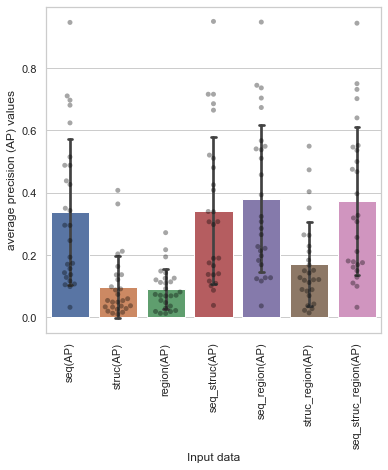

In [29]:
# plot the boxplot of Fig.S1 (b)
import seaborn as sns
f = plt.figure(figsize = (6,6))
sns.set(style="whitegrid")
sns.barplot(x="variable", y="value", data=df, capsize=.1, ci="sd")
sns.swarmplot(x="variable", y="value", data=df, color="0", alpha=.35)
#f.savefig("input_data_AP_values.pdf", bbox_inches='tight')
plt.xlabel('Input data')
plt.ylabel("average precision (AP) values")
plt.xticks(rotation = 90)
plt.show()

In [30]:
df_AUROC = pd.DataFrame(np.zeros(num_task_low*8).reshape(num_task_low,8),
                  columns=['RBPnames','seq(AUROC)', 'struc(AUROC)', 'region(AUROC)','seq_struc(AUROC)','seq_region(AUROC)','struc_region(AUROC)','seq_struc_region(AUROC)'])
df_AUROC.loc[:, 'RBPnames'] = RBPnames_low
df_AUROC.loc[:, 'seq(AUROC)'] = roc_auc_seq
df_AUROC.loc[:, 'struc(AUROC)'] = roc_auc_struc
df_AUROC.loc[:, 'region(AUROC)'] = roc_auc_region
df_AUROC.loc[:, 'seq_struc(AUROC)'] = roc_auc_seq_struc
df_AUROC.loc[:, 'seq_region(AUROC)'] = roc_auc_seq_region
df_AUROC.loc[:, 'struc_region(AUROC)'] = roc_auc_struc_region
df_AUROC.loc[:, 'seq_struc_region(AUROC)'] = roc_auc_seq_struc_region
#df_AUROC.to_csv('supplemental_file_4.csv', index = False)
df = df_AUROC.melt(id_vars=['RBPnames'])
df.head ()

,RBPnames,variable,value
0,MBNL1,seq(AUROC),0.984247
1,P53_NONO,seq(AUROC),0.906434
2,PUM2,seq(AUROC),0.946066
3,QKI,seq(AUROC),0.978222
4,AGO3,seq(AUROC),0.871798


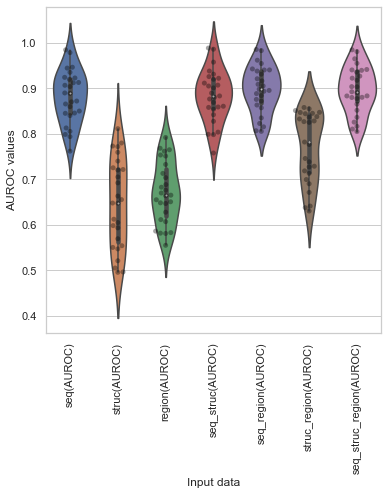

In [31]:
# plot the violin plot of Fig.S1 (a)
f = plt.figure(figsize = (6,6))
sns.set(style="whitegrid")
sns.violinplot(x="variable", y="value", data=df, capsize=.1, ci="sd")
sns.swarmplot(x="variable", y="value", data=df, color="0", alpha=.35)
#f.savefig("Input_data_AUROC_values.pdf", bbox_inches='tight')
plt.xlabel('Input data')
plt.ylabel("AUROC values")
plt.xticks(rotation = 90)
plt.show()